<a href="https://colab.research.google.com/github/Pathin220/4105_Project/blob/main/Project_3_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from IPython.display import display
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Machine Learning/DataSets/DataSet3/heart.csv'
dataset = pd.DataFrame(pd.read_csv(file_path))
dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Y_hat = 0.018 + 1.0*X1 
Y_hat = 0.153 + 0.398*X2 
Y_hat = nan + nan*X3 
Y_hat = nan + nan*X1 + nan*X2 + nan*X3 


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-11-1fa1ba99b1b8>:26: RuntimeWarning: overflow encountered in square
  sqrerrors = np.square(errors)


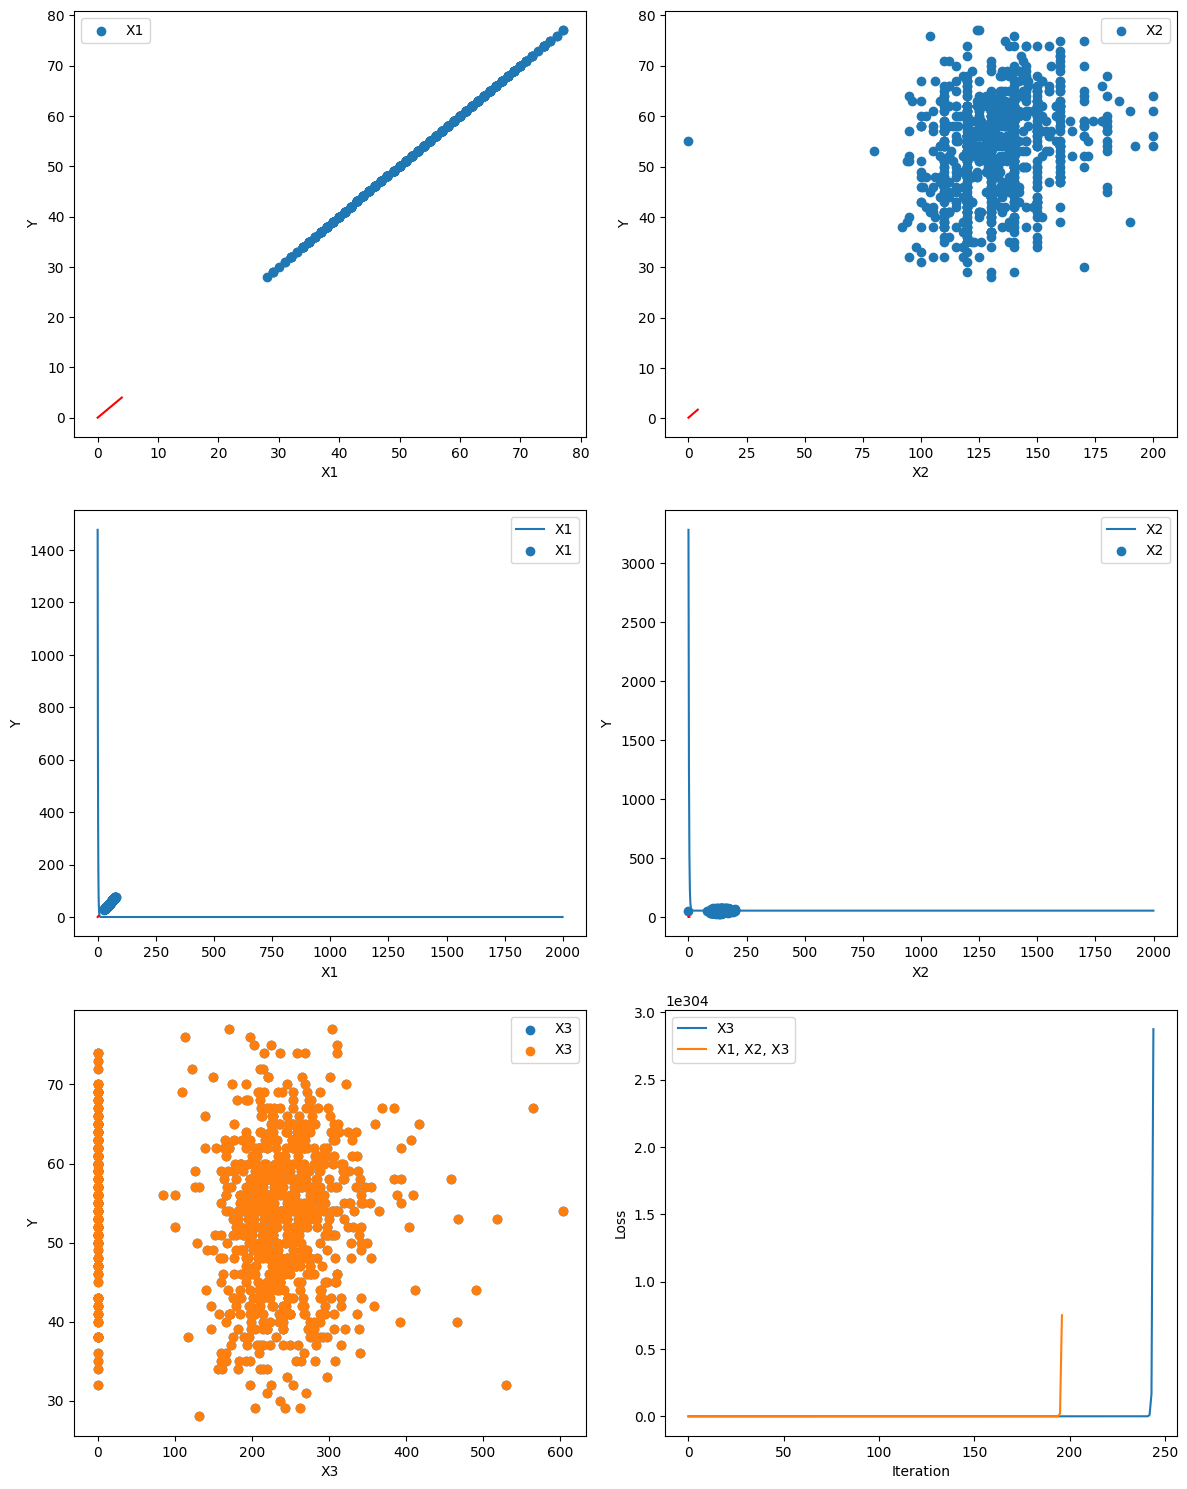

In [11]:
# One-hot encode the columns
dataset = pd.get_dummies(dataset, columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'], drop_first=True)

# Parameters
alpha = 0.0001
theta2 = np.zeros(2).reshape(2, 1)
theta4 = np.zeros(4).reshape(4, 1)
iterations = 2000

# Calcs
n = len(dataset) - 1
iter = np.arange(0, iterations, 1)
reg_range = np.linspace(0, 4, 100)
# Convert the target variable to numeric, handling non-numeric values
Y = pd.to_numeric(dataset['Age'], errors='coerce').values.reshape(n + 1, 1)
Y = np.nan_to_num(Y)  # Replace NaN values with zeros
X0 = np.ones((n + 1, 1))
loss = []


# Cost Function iteration
def J(X, Y, theta, alpha, iterations):
    for i in range(iterations):
        Y_hat = X.dot(theta).reshape(n + 1, 1)
        errors = np.subtract(Y_hat, Y)
        sqrerrors = np.square(errors)
        cost = 1 / (2 * n + 1) * sqrerrors.sum()
        loss.append(cost)

        sum_delta = (alpha / (n + 1)) * X.transpose().dot(errors)
        theta -= sum_delta

    return theta


# Function to print linear regression equation
def print_regression_equation(theta, variables):
    equation = f"Y_hat = {round(float(theta[0]), 3)} + "
    for i in range(1, len(theta)):
        equation += f"{round(float(theta[i]), 3)}*{variables[i-1]} + "
    print(equation[:-2])  # Remove the trailing '+ '


# Plotting function
def plot_regression(ax, X_var, Y_var, Y_pred, label, xlabel):
    ax.scatter(X_var, Y_var, label=label)
    ax.plot(reg_range, Y_pred, 'r')
    ax.legend()
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Y')


# Plotting function for loss
def plot_loss(ax, loss, label):
    ax.plot(loss, label=label)
    ax.legend()
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Loss')


# Plotting subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 15))

# Plot for X1
X1 = dataset.values[:, 0].reshape(n + 1, 1)
X = np.hstack((X0, X1))
theta2 = J(X, Y, theta2, alpha, iterations)
Y_1 = float(theta2[0]) + float(theta2[1]) * reg_range
plot_regression(axs[0, 0], X1, Y, Y_1, 'X1', 'X1')
plot_loss(axs[1, 0], loss, 'X1')
print_regression_equation(theta2, ['X1'])

# Plot for X2
loss = []  # Reset loss for the next variable
X2 = dataset.values[:, 1].reshape(n + 1, 1)
X = np.hstack((X0, X2))
theta2 = J(X, Y, theta2, alpha, iterations)
Y_2 = float(theta2[0]) + float(theta2[1]) * reg_range
plot_regression(axs[0, 1], X2, Y, Y_2, 'X2', 'X2')
plot_loss(axs[1, 1], loss, 'X2')
print_regression_equation(theta2, ['X2'])

# Plot for X3
loss = []  # Reset loss for the next variable
X3 = dataset.values[:, 2].reshape(n + 1, 1)
X = np.hstack((X0, X3))
theta2 = J(X, Y, theta2, alpha, iterations)
Y_3 = float(theta2[0]) + float(theta2[1]) * reg_range
plot_regression(axs[2, 0], X3, Y, Y_3, 'X3', 'X3')
plot_loss(axs[2, 1], loss, 'X3')
print_regression_equation(theta2, ['X3'])

# Plot for 3 variables
loss = []  # Reset loss for the next variable
X = np.hstack((X0, X1, X2, X3))
theta4 = J(X, Y, theta4, alpha, iterations)
Y_4 = float(theta4[0]) + float(theta4[1]) * reg_range + float(theta4[2]) * reg_range + float(theta4[3]) * reg_range
plot_regression(axs[1, 0], X1, Y, Y_1, 'X1', 'X1')
plot_regression(axs[1, 1], X2, Y, Y_2, 'X2', 'X2')
plot_regression(axs[2, 0], X3, Y, Y_3, 'X3', 'X3')
plot_loss(axs[2, 1], loss, 'X1, X2, X3')
print_regression_equation(theta4, ['X1', 'X2', 'X3'])

plt.tight_layout()
plt.show()